In [10]:
import os
import sys

sys.path.append('..')

In [11]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from PIL import Image

In [49]:
%matplotlib inline
# %matplotlib widget

In [50]:
DATA_ROOT = '../data/cityscapes/gtProc'
TEST_DATA_ROOT = '../data/cityscapes/gtProc_test'
print(os.path.exists(DATA_ROOT))

True


In [51]:
split = 'train'
city = 'aachen'

edge_name = 'aachen_000173_000019_gtProc_edge.png'

split = 'train'
city = 'aachen'
edge_name = 'aachen_000172_000019_gtProc_edge.png'

split = 'train'
city = 'strasbourg'
edge_name = 'strasbourg_000001_040620_gtProc_edge.png'

split = 'val'
city = 'frankfurt'
edge_name = 'frankfurt_000001_002759_gtProc_edge.png'

split = 'train'
city = 'hanover'
edge_name = 'hanover_000000_029455_gtProc_edge.png'

In [52]:
test_path = os.path.join(TEST_DATA_ROOT, split, city, edge_name)
edge_path = os.path.join(DATA_ROOT, split, city, edge_name)

assert os.path.exists(test_path)
assert os.path.exists(edge_path)

In [53]:
edge_img = Image.open(edge_path)
test_img = Image.open(test_path)

In [54]:
_, ext = os.path.splitext(test_path)

if ext == ".tif":
    # tif
    edge = np.array(edge_img).astype(np.uint32)
    test = np.array(test_img).astype(np.uint32)

    edge = edge[:, :, None]
    edge = np.unpackbits(
        edge.view(np.uint8),
        axis=2,
        count=19,
        bitorder='little',
    )
    test = test[:, :, None]
    test = np.unpackbits(
        test.view(np.uint8),
        axis=2,
        count=19,
        bitorder='little',
    )
elif ext == ".png":
    # png
    edge = np.array(edge_img, dtype=np.uint8)
    test = np.array(test_img, dtype=np.uint8)
    
    edge = np.unpackbits(
        edge,
        axis=2,
    )[:, :, -1:-20:-1]
    test = np.unpackbits(
        test,
        axis=2,
    )[:, :, -1:-20:-1]

edge = np.transpose(edge, (2, 0, 1))
test = np.transpose(test, (2, 0, 1))

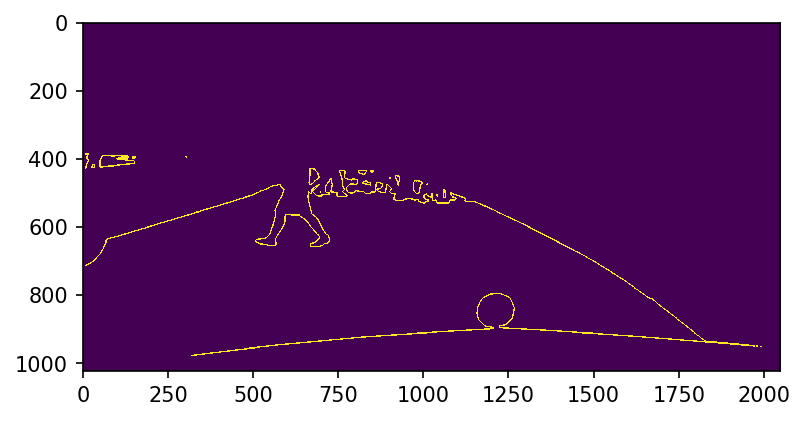

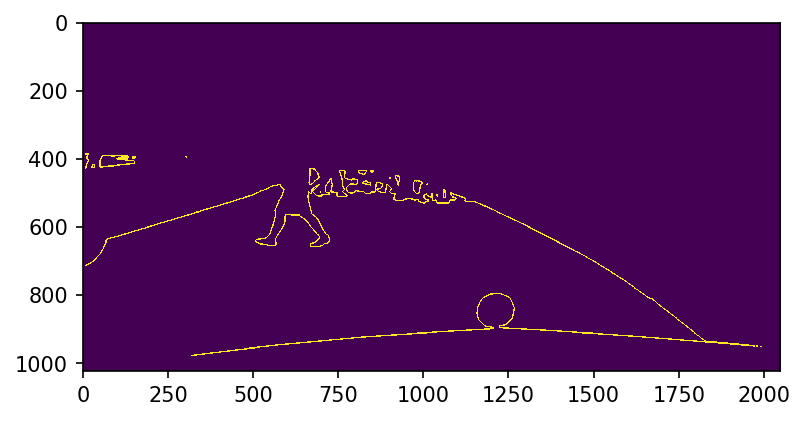

In [55]:
trainId = 0

plt.imshow(edge[trainId], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

plt.imshow(test[trainId], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

In [56]:
print('diffs', np.count_nonzero(edge != test))
print('is close', np.allclose(edge, test))
print('is equal', np.array_equal(edge, test))

diffs 7
is close False
is equal False


In [57]:
bin_edge = (np.sum(edge, axis=0) > 0).astype(np.uint8)
bin_test = (np.sum(test, axis=0) > 0).astype(np.uint8)

print('diffs', np.count_nonzero(bin_edge != bin_test))
print('is equal', np.array_equal(bin_edge, bin_test))

diffs 4
is equal False


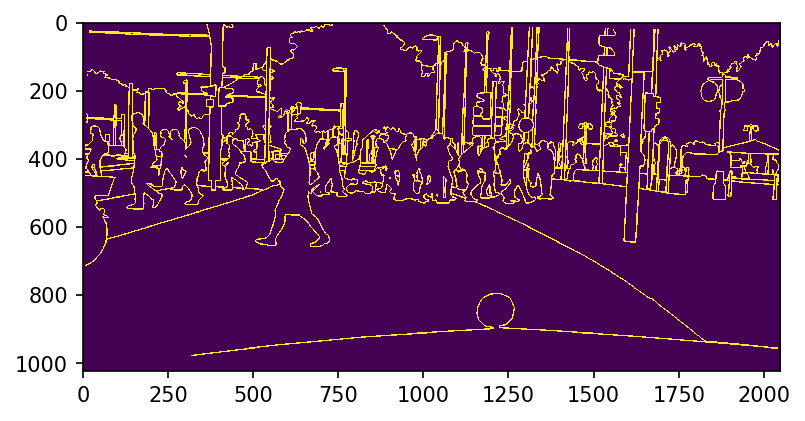

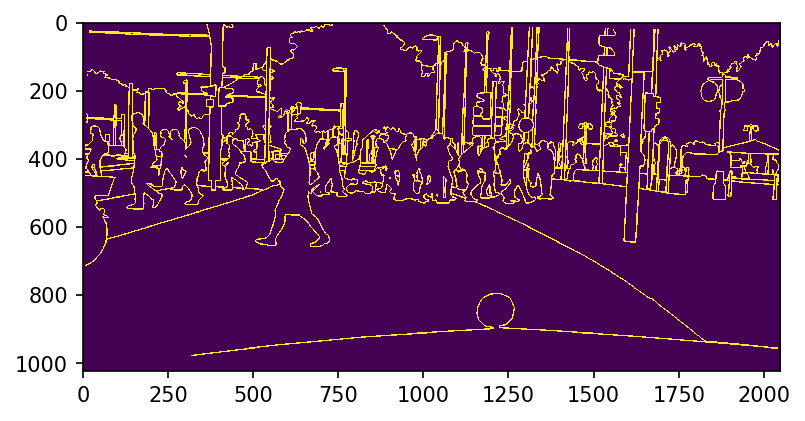

In [58]:
plt.imshow(bin_edge, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

plt.imshow(bin_test, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

In [59]:
yx = np.where(bin_edge != bin_test)

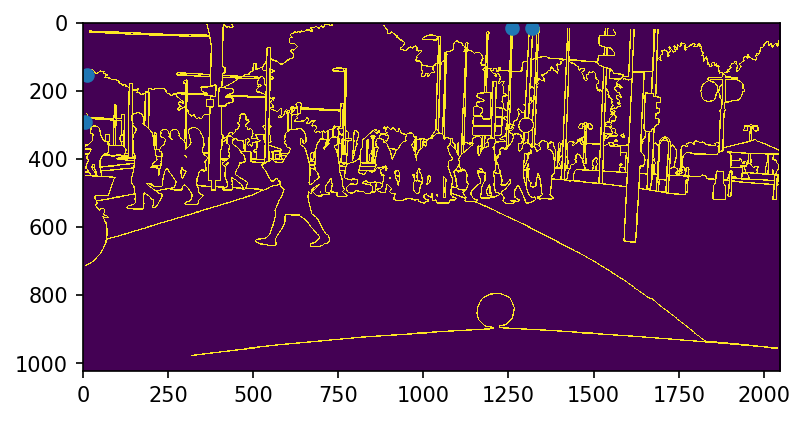

In [60]:
plt.imshow(bin_edge, interpolation='nearest')
plt.scatter(yx[1], yx[0], marker='o')
plt.gcf().set_dpi(150)
plt.show()